In [99]:
import pandas as pd
import numpy as np
#from mpl_finance import candlestick_ohlc

from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 7]

plt.rc('font', size=14)

In [146]:
## add the PD source and columns 
df = pd.read_json('BN-main/BTC_USDT-1h.json')
df.columns=['Date','Open','High','Low','Close','Volume']


#ada15['Open'].astype(float)



In [147]:
#start = pd.to_datetime('2020-01-01')
df['date']=df['Date']
df.Date=pd.to_datetime(df['Date'],unit='ms')

start = pd.to_datetime('2021-05-01')
end = pd.to_datetime('2021-05-20')
df = df.loc[(df['Date']> start)& (df['Date']< end)].copy()


df['Date'] = df['Date'].apply(mpl_dates.date2num)


for col in ['Open','High','Low','Close','Volume']:
    df[col].astype(float)
    

#df.Date(index)
#df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
df

,Date,Open,High,Low,Close,Volume,date
2874,737911.041667,57809.99,58456.52,57470.77,58450.00,2988.380634,1619830800000
2875,737911.083333,58450.00,58458.07,57931.89,58100.00,2232.499152,1619834400000
2876,737911.125000,58100.01,58248.54,58031.86,58178.67,1395.611098,1619838000000
2877,737911.166667,58177.59,58245.33,57687.04,58052.37,2019.998441,1619841600000
2878,737911.208333,58052.37,58422.31,57896.85,58134.44,1754.779387,1619845200000
...,...,...,...,...,...,...,...
3324,737929.791667,37961.01,39499.94,37711.00,39342.93,9791.172571,1621450800000
3325,737929.833333,39337.45,40200.00,37962.91,38217.41,10297.233515,1621454400000
3326,737929.875000,38222.20,38956.99,37032.96,38771.77,9138.808561,1621458000000
3327,737929.916667,38777.05,39800.00,38014.01,39090.15,7374.808601,1621461600000


In [148]:
## support and resitance

def isSupport(df,i):
    support = df['Low'][i] < df['Low'][i-1]  and df['Low'][i] < df['Low'][i+1] and df['Low'][i+1] < df['Low'][i+2] and df['Low'][i-1] < df['Low'][i-2]
    return support

def isResistance(df,i):
    resistance = df['High'][i] > df['High'][i-1]  and df['High'][i] > df['High'][i+1] and df['High'][i+1] > df['High'][i+2] and df['High'][i-1] > df['High'][i-2] 
    return resistance

In [149]:
df.idxmin()
df.first_valid_index() - df.shape[0]-2
start = df.first_valid_index()+2
end =  (df.first_valid_index()+df.shape[0])-2
start

2876

In [150]:
## levels 
levels = []
for i in range(start,end):
    if isSupport(df,i):
        levels.append((i,df['Low'][i]))
    elif isResistance(df,i):
        levels.append((i,df['High'][i]))


In [151]:
#df = ada2021.loc[:,['Date','Open','High','Low','Close']]
df

,Date,Open,High,Low,Close,Volume,date
2874,737911.041667,57809.99,58456.52,57470.77,58450.00,2988.380634,1619830800000
2875,737911.083333,58450.00,58458.07,57931.89,58100.00,2232.499152,1619834400000
2876,737911.125000,58100.01,58248.54,58031.86,58178.67,1395.611098,1619838000000
2877,737911.166667,58177.59,58245.33,57687.04,58052.37,2019.998441,1619841600000
2878,737911.208333,58052.37,58422.31,57896.85,58134.44,1754.779387,1619845200000
...,...,...,...,...,...,...,...
3324,737929.791667,37961.01,39499.94,37711.00,39342.93,9791.172571,1621450800000
3325,737929.833333,39337.45,40200.00,37962.91,38217.41,10297.233515,1621454400000
3326,737929.875000,38222.20,38956.99,37032.96,38771.77,9138.808561,1621458000000
3327,737929.916667,38777.05,39800.00,38014.01,39090.15,7374.808601,1621461600000


In [152]:
levels

[(2882, 57116.16),
 (2885, 58043.01),
 (2888, 56956.14),
 (2896, 57939.0),
 (2901, 56171.31),
 (2906, 56035.25),
 (2918, 57141.05),
 (2919, 56212.0),
 (2922, 58289.99),
 (2925, 57696.7),
 (2929, 58981.44),
 (2937, 57169.0),
 (2942, 56435.0),
 (2944, 57457.12),
 (2949, 55122.0),
 (2955, 56637.89),
 (2961, 53201.01),
 (2969, 52900.0),
 (2975, 53922.84),
 (2985, 58069.82),
 (3003, 58360.0),
 (3012, 55200.0),
 (3017, 57122.17),
 (3034, 58650.0),
 (3045, 58599.99),
 (3047, 57500.0),
 (3049, 59379.26),
 (3054, 59438.64),
 (3056, 57472.95),
 (3069, 57575.0),
 (3084, 57048.96),
 (3093, 59500.0),
 (3105, 58593.7),
 (3109, 53400.0),
 (3123, 56190.0),
 (3125, 54766.44),
 (3137, 57360.07),
 (3141, 58000.01),
 (3151, 56900.0),
 (3156, 53500.0),
 (3158, 54751.92),
 (3161, 46000.0),
 (3168, 51367.19),
 (3178, 47000.0),
 (3184, 48350.0),
 (3186, 50390.7),
 (3198, 50037.0),
 (3206, 49030.0),
 (3210, 50700.0),
 (3230, 48738.75),
 (3233, 46467.0),
 (3243, 49795.89),
 (3253, 43825.39),
 (3257, 46686.0),
 

In [153]:
def plot_all():
  fig, ax = plt.subplots()

  candlestick_ohlc(ax,df.values,width=0.02, \
                   colorup='green', colordown='red', alpha=0.2)

  date_format = mpl_dates.DateFormatter('%s %m %h %d %b %Y')
  ax.xaxis.set_major_formatter(date_format)
  fig.autofmt_xdate()

  fig.tight_layout()

  for level in levels:
    plt.hlines(level[1],xmin=df['Date'][level[0]],xmax=max(df['Date']),colors='blue')
  fig.show()

/Users/hjabbour/opt/anaconda3/envs/ML/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


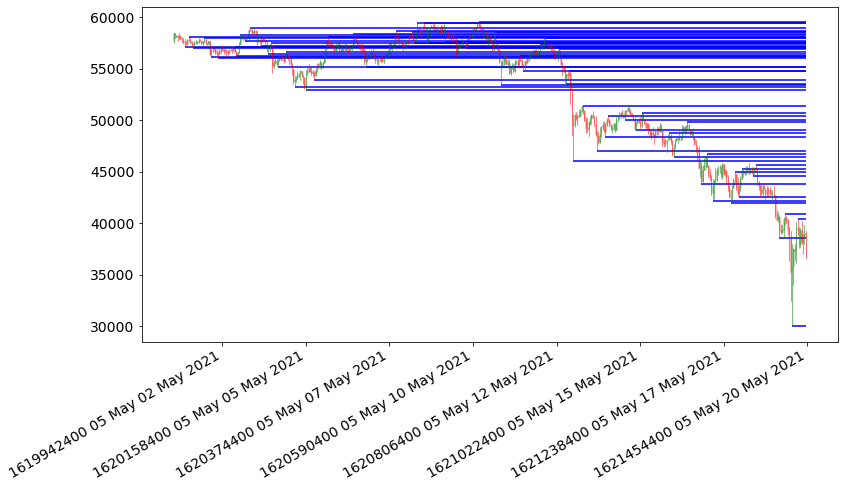

In [154]:
plot_all()